<a href="https://colab.research.google.com/github/janhavishembade/Telecom-Churn-Analysis/blob/main/Capstone_Project_1_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probelm Statement:-
**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.**

**Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

# Buisness Context View:-
**Churn is a good indicator of growth potential. Churn rates track lost customers, and growth rates track new customers—comparing and analyzing both of these metrics tells you exactly how much your business is growing over time. If growth is higher than churn, you can say your business is growing. If churn is higher than growth, your business is getting smaller.**

**The main goal of our project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.**

# Importing Libarary/ Module and connecting to drive

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the Dataset/Reading the Dataset first Look

In [7]:
#setting the filepath from drive
filepath="/content/drive/MyDrive/AlmaBetter/Capstone Project1_Telecom_Churn_Analysis/Telecom Churn.csv"

In [8]:
#insert the filepath in csv format to read
dataset=pd.read_csv(filepath)
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#Know more about dataset

In [9]:
#lets take first 5 rows and columns
dataset.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
#lets take last 5 columns from dataset
dataset.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [11]:
#shape of dataset
dataset.shape

(3333, 20)

In [12]:
#get all columns
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# More About column name
**STATE**: 51 Unique States name

**Account** Length: Length of The Account

**Area Code:** Code Number of Area having some States

I**nternational Plan**: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:** Total Number of Minutes Spent in Morning

**Total day calls:** Total Number of Calls made in Morning.

**Total day charge:** Total Charge to the Customers in Morning.

**Total eve minutes:** Total Number of Minutes Spent in Evening

**Total eve calls**: Total Number of Calls made r in Evening.

Total eve charge: Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes Spent in the Night.

**Total night calls:** Total Number of Calls made in Night.

**Total night charge**: Total Charge to the Customers in Night.

**Customer service calls** Number of customer service calls made by customer

**Churn** Customer Churn, True means churned customer, False means retained customer

#Lets Do Feature Engineering
Will do with Basic Imputations like Catogoric or Numeric 
Detect Outliers
Finding Missing values
Filling Missing values(mean,mode,median)

In [13]:
#Lets check details about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [14]:
#Lets describe the Dataset
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
#Lets check with null values
dataset.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**So here we can see that there is no missing value is  present**

In [16]:
#Lets chek duplicate value is present or not
len(dataset[dataset.duplicated()])

0

**So as of now there are 3333 rows and 20 column is present**

*  **1 Boolean data type i.e Churn**
*  **8 Integer data type**

*  **8 Float data type**
*  **No Missing value present so no need of missing value imputation methods**

*  **No Duplicate value is presen**
*  **3 Catogorical/Object data is present i.e State,International plan,Voice   mailplan**

#Lets try to make churn as an output/ Target Variable

In [17]:
#here i take churn as an output or target variable
print(dataset['Churn'].unique())
max(dataset['Churn'])

[False  True]


True

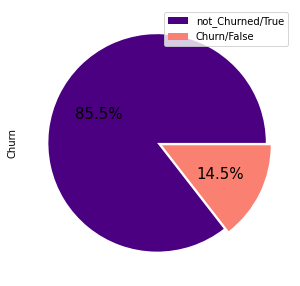

In [18]:
#Lets plot the graph of churn which has boolean values True or false
plt.figure(figsize=(7,5))

dataset['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['not_Churned/True', 'Churn/False'])
plt.show()

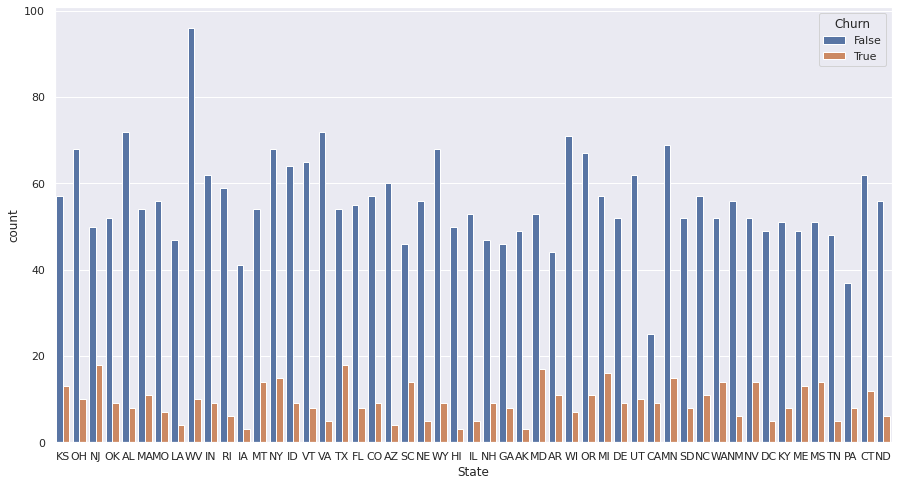

In [19]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=dataset)
plt.show()

#Lets Analyze Acoount Lenth wrt to churn

In [20]:
#Separating churn and non churn customers
churn_df     = dataset[dataset["Churn"] == bool(True)]
not_churn_df = dataset[dataset["Churn"] == bool(False)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


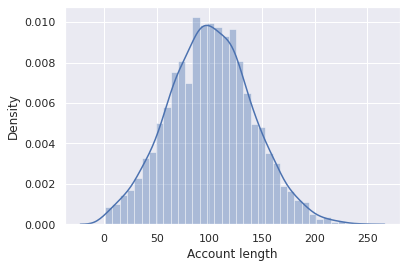

In [21]:

#Lets plot the distplot of account length
sns.distplot(dataset['Account length'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

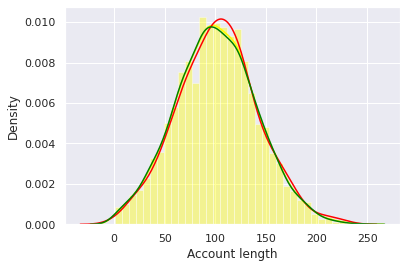

In [22]:
#lets plot the graph with distance plot against the churned and not churned customers with account length
sns.distplot(dataset['Account length'],color = 'yellow',label="All")
sns.distplot(churn_df['Account length'],color='red',hist=False,label='Churned')
sns.distplot(not_churn_df['Account length'],color='green',hist=False,label='Not_Churned')

#Analyze Area of code wrt to churn

In [23]:
#analyze code with churn and area of code
Area_code_data = pd.crosstab(dataset["Area code"],dataset["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


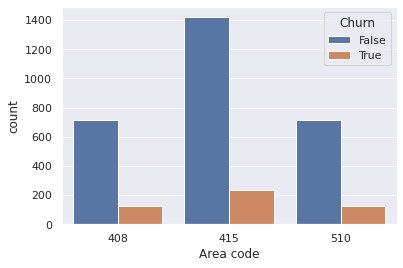

In [24]:
#show the countplot with area of code wrt churn
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue="Churn", data=dataset)
plt.show()

# Lets Try with International plan

In [25]:
##analyze with two catogorical data with crosstab function
churned_international_plan=pd.crosstab(dataset['International plan'],dataset['Churn'])
churned_international_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


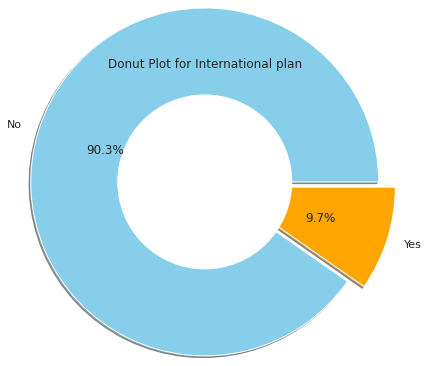

In [26]:
#To get the Donut Plot to analyze International Plan
data = dataset['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

# Voice mail plan

In [27]:

#doin same as like international plan
voice_mail_plan_data=pd.crosstab(dataset['Voice mail plan'],dataset['Churn'])
print(voice_mail_plan_data)

Churn            False  True
Voice mail plan             
No                2008   403
Yes                842    80


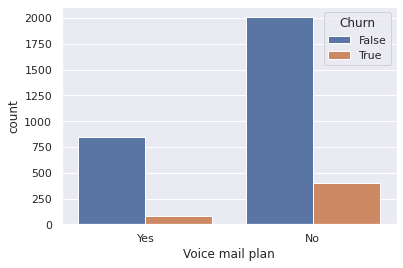

In [28]:
sns.countplot(x='Voice mail plan',hue='Churn',data=dataset)

# Lets try to analyze number of vmail messages wrt churn

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x576 with 0 Axes>

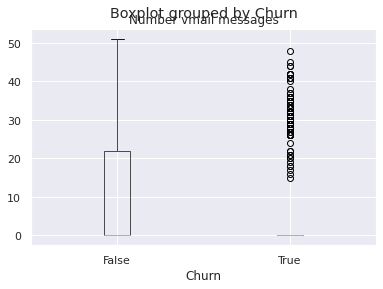

In [29]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
dataset.boxplot(column='Number vmail messages',by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

In [30]:
#x=dataset['Churn']
#new_churn = [int(item) for item in x]


In [31]:
#df=pd.DataFrame(new_churn)
#df

In [32]:
#DF1=pd.concat([dataset,df],axis=1)
#DF1

In [33]:
#DF1.drop('Churn',axis="columns",inplace=True)
#DF1


In [34]:
#DF1.rename(columns = {0:'new_churner'}, inplace = True)
#DF1

# Lets Plot all the total  related graps with respect to churn

In [35]:
#Defining bar chart function
def box(feature, df=dataset):
    
    #Groupby the categorical feature
    temp_df = dataset.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_DF1 = dataset[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_DF1.iterrows()]
    
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_DF1.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',align='left',showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [36]:
#DF1.loc[DF1.new_churner==0,'new_churner'] = "No"   #convert 0 to No in all data instances
#DF1.loc[DF1.new_churner==1,'new_churner'] = "Yes"  #convert 1 to Yes in all 

In [37]:
box('Total intl charge')
box('Total day minutes')
box('Total day calls')
box('Total day charge')
box('Total eve minutes')

#  Lets do some univariate and Bivariate Analysis

# Univariate analysis Uni ="One" variate="variable"

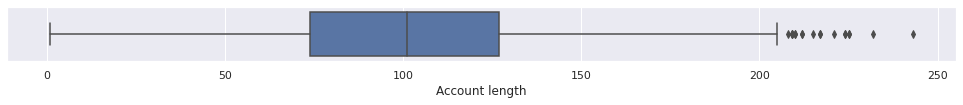

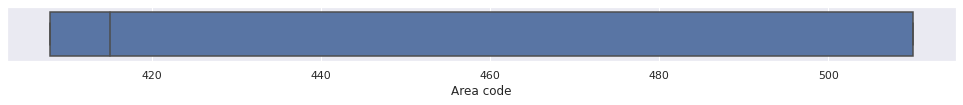

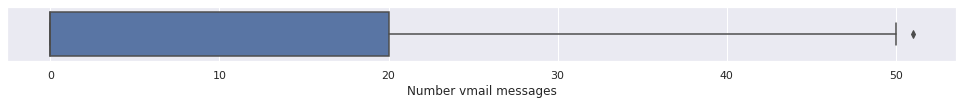

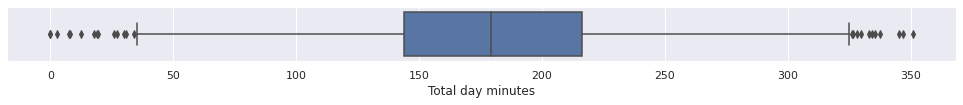

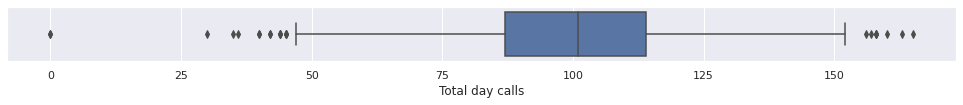

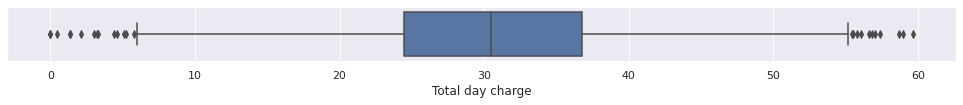

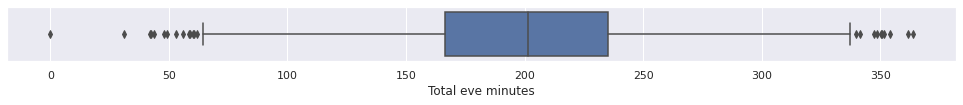

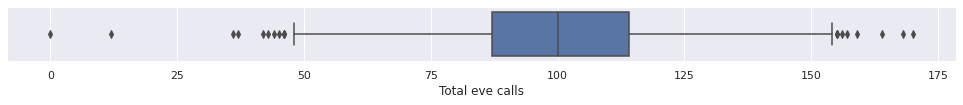

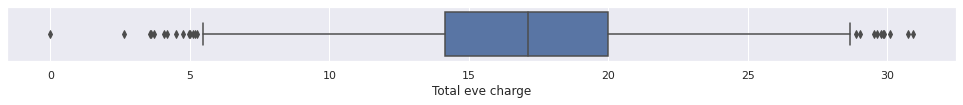

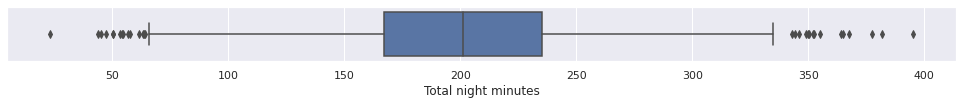

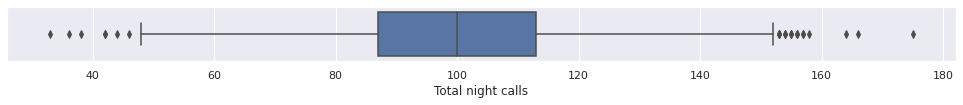

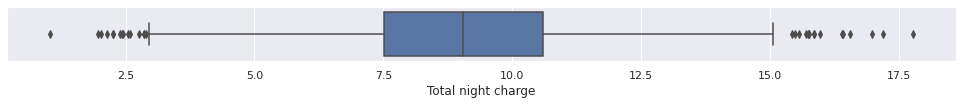

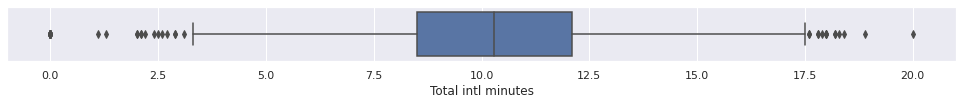

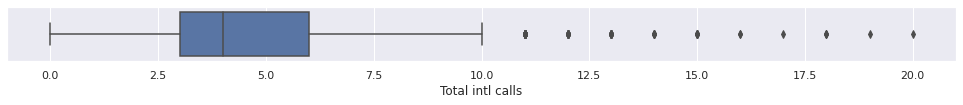

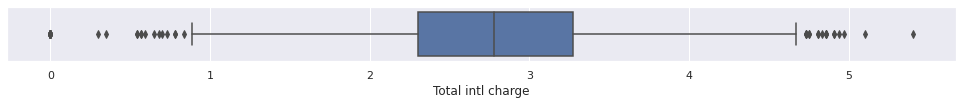

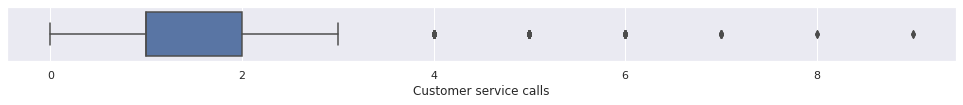

In [38]:
#Printing boxplot for each numerical column present in the data set
df=dataset.select_dtypes(exclude=['object','bool'])
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dataset, x=column)
plt.show()

<ipython-input-39-dd1c1c56165d>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-39-dd1c1c56165d>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.8/dist-packages/seaborn/axisgr

<Figure size 1224x72 with 0 Axes>

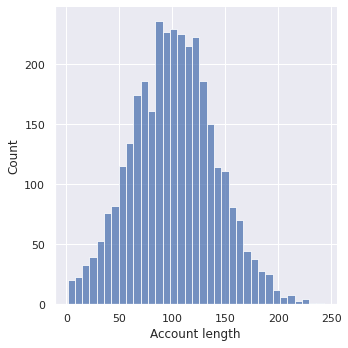

<Figure size 1224x72 with 0 Axes>

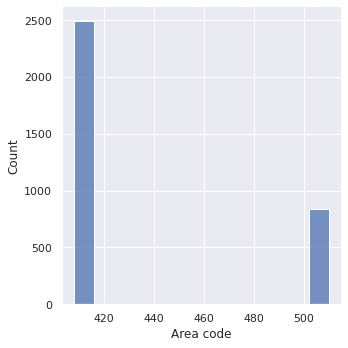

<Figure size 1224x72 with 0 Axes>

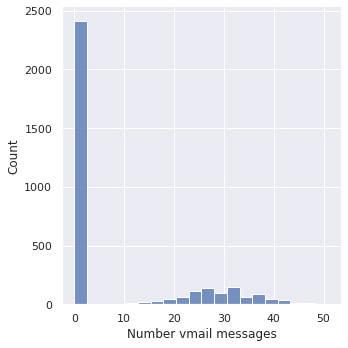

<Figure size 1224x72 with 0 Axes>

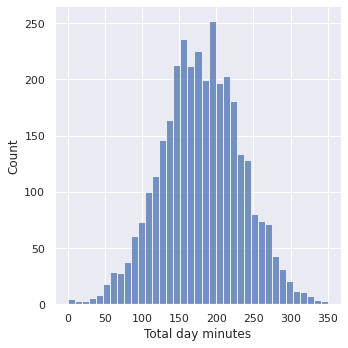

<Figure size 1224x72 with 0 Axes>

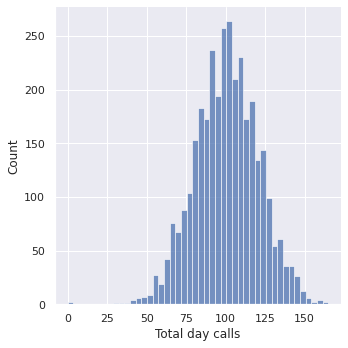

<Figure size 1224x72 with 0 Axes>

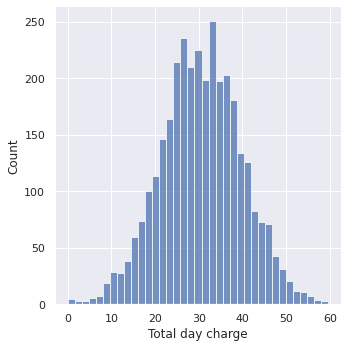

<Figure size 1224x72 with 0 Axes>

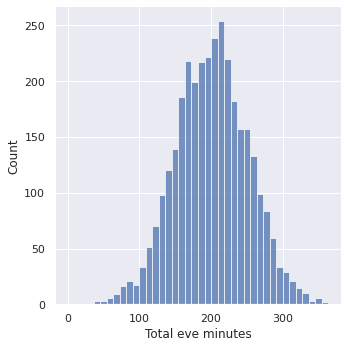

<Figure size 1224x72 with 0 Axes>

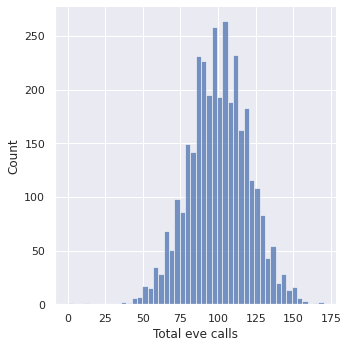

<Figure size 1224x72 with 0 Axes>

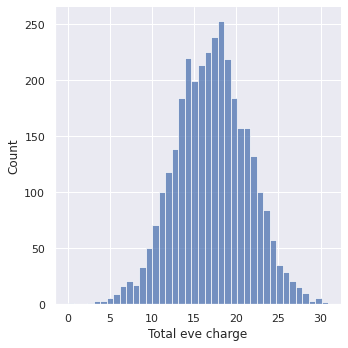

<Figure size 1224x72 with 0 Axes>

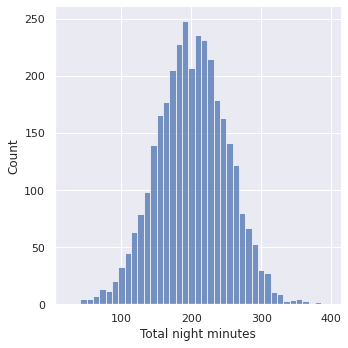

<Figure size 1224x72 with 0 Axes>

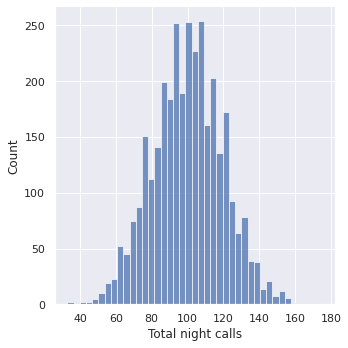

<Figure size 1224x72 with 0 Axes>

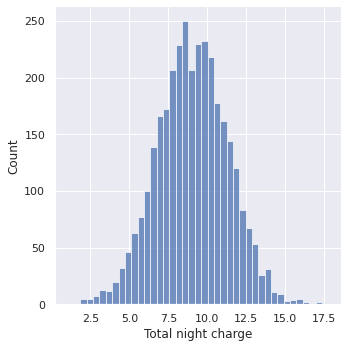

<Figure size 1224x72 with 0 Axes>

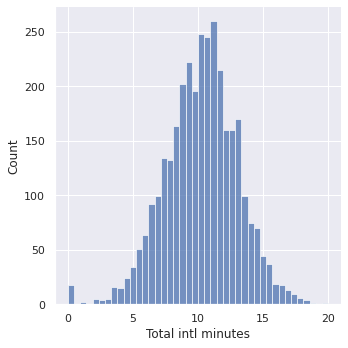

<Figure size 1224x72 with 0 Axes>

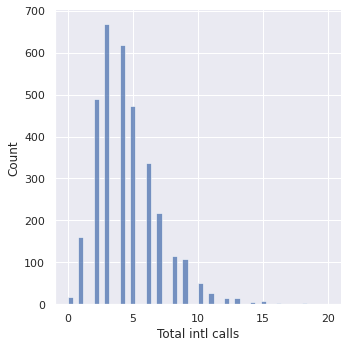

<Figure size 1224x72 with 0 Axes>

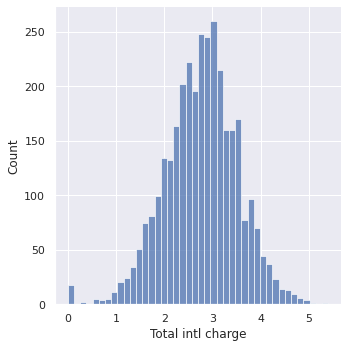

<Figure size 1224x72 with 0 Axes>

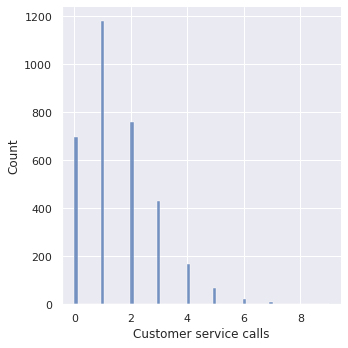

In [39]:
#Printing distance plot for each numerical column present in the data set
df1=dataset.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=dataset, x=column)
plt.show()

# Bivariate analysis Bi="Two" variate="variable"



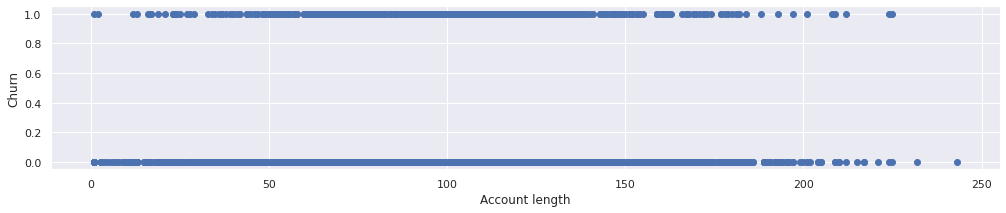

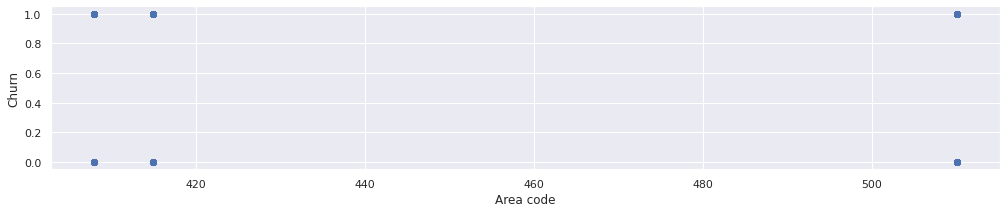

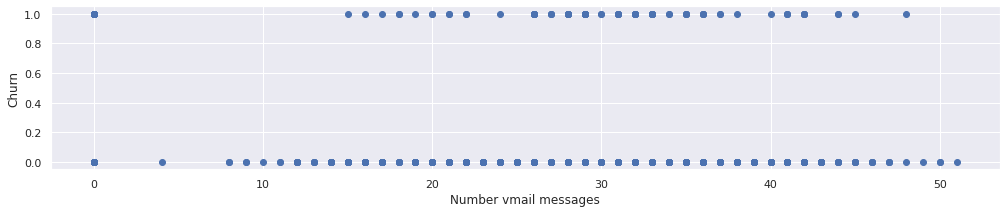

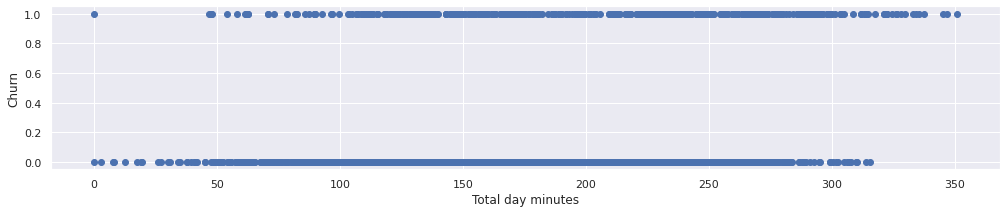

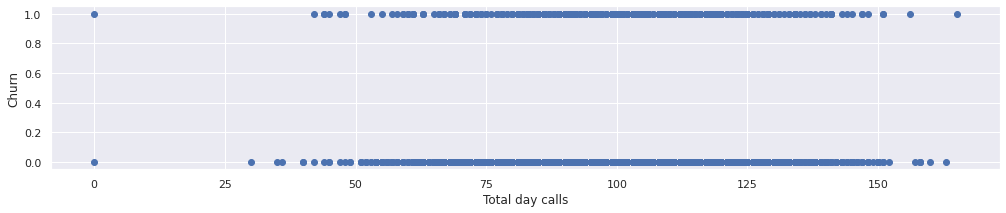

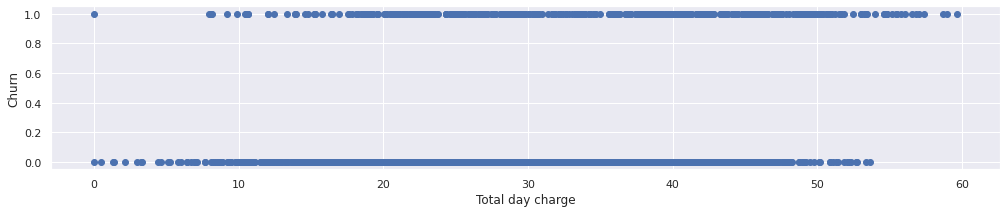

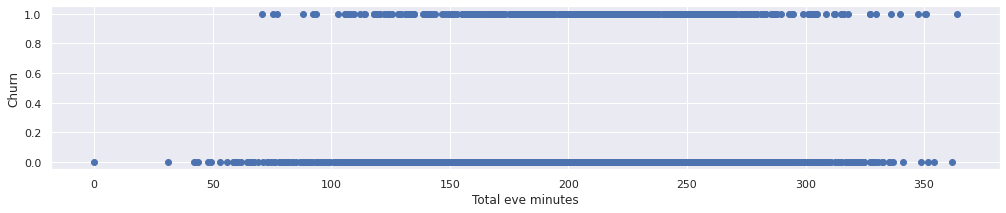

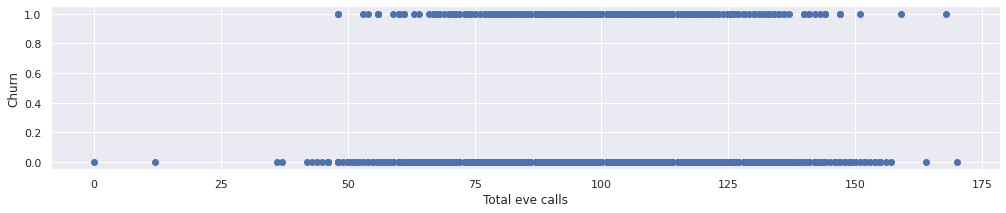

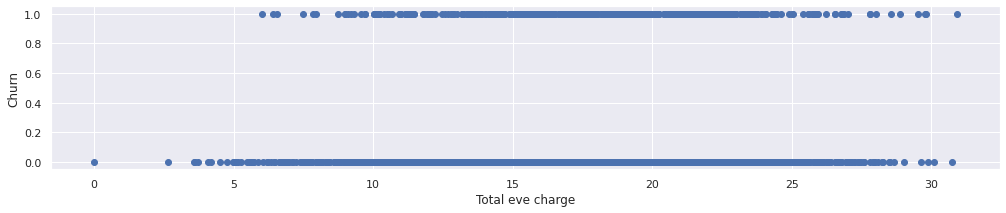

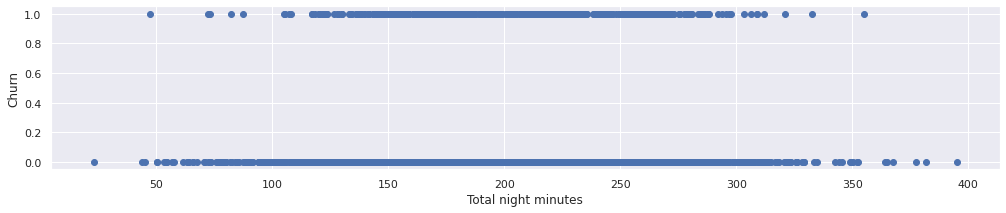

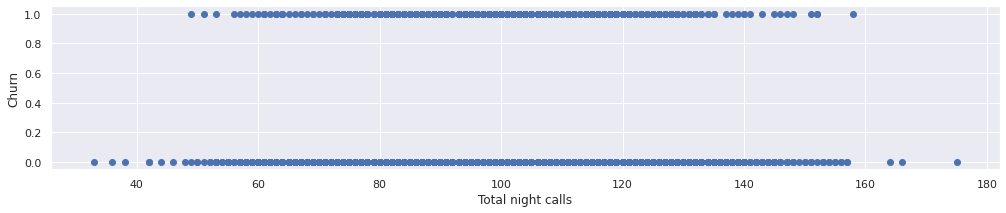

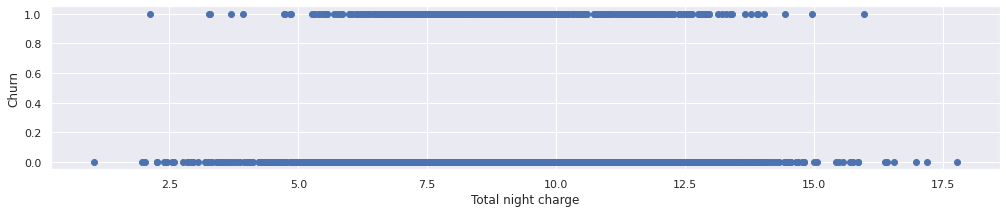

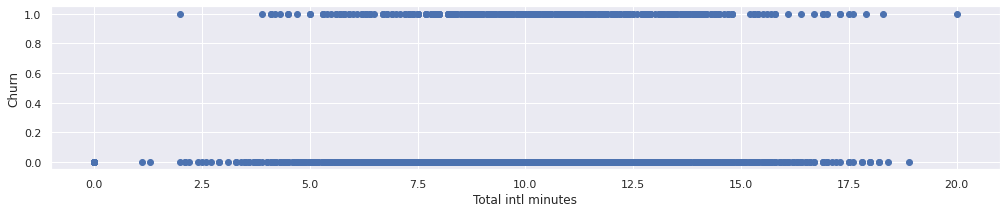

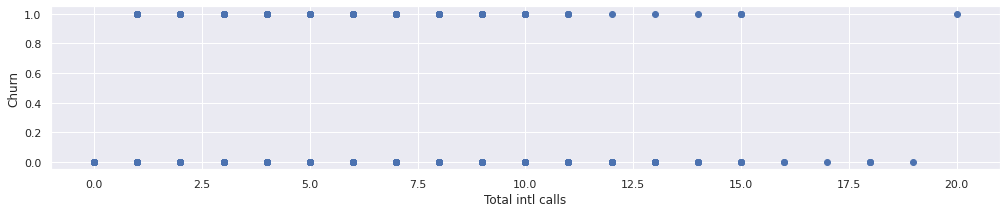

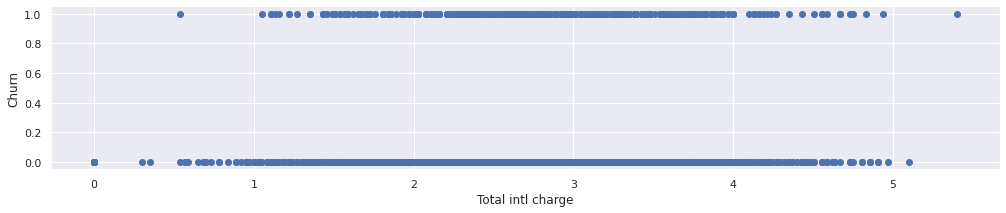

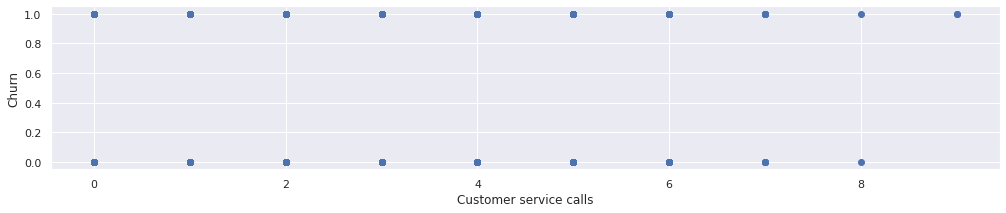

In [40]:
# Plot a boxplot for churn column  by each numerical feature present in the data set
df2= dataset.describe().columns
for col in df2:
  fig=plt.figure(figsize=(17,3))
  ax=fig.gca()
  feature=dataset[col]
  label=dataset['Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Churn')
plt.show()

# Multivariate analysis

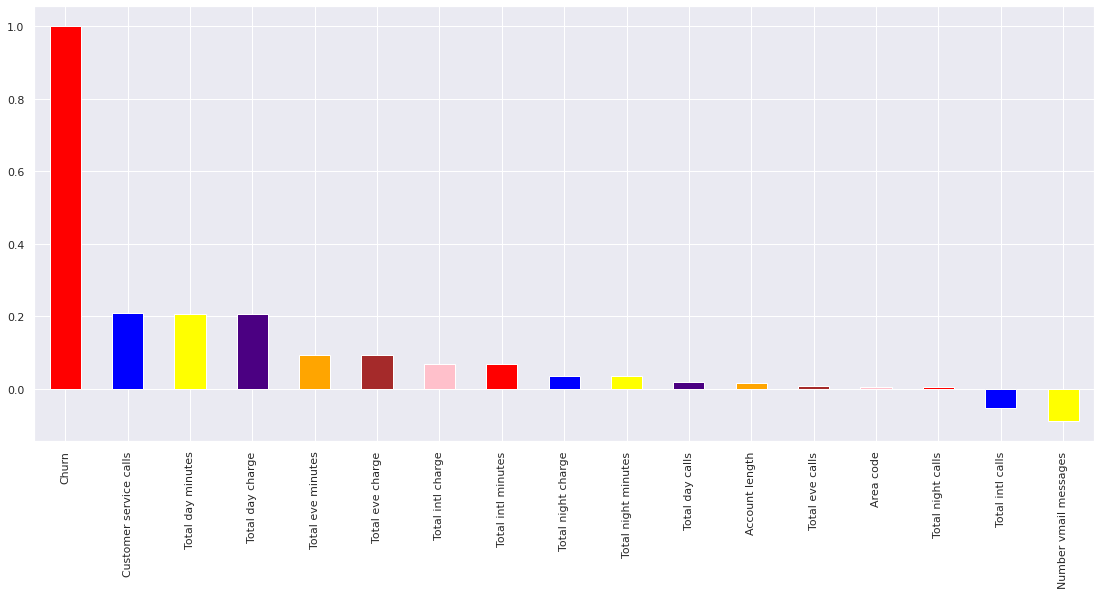

In [41]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])

In [42]:
#Lets Find the correlation

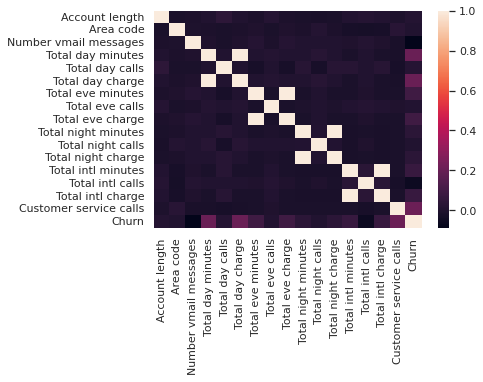

In [43]:
sns.heatmap(dataset.corr())

# **Conclusion**

**In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.**

**In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.**